In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import requests as req
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "mASfKnDIqTr8R2DWH2sGgly4y"
consumer_secret = "J5vkMT0O7LaiVOoqVjdzZrcBFGbVpITidUm482zZmTqQOJSGya"
access_token = "94037456-d7ycRTHsUuKN2okXLBRaCIGpcnbpxNNaLEEg4q4oD"
access_token_secret = "LDn6HRwemUPJU2wI5J15HuQwC6xizLvZO2SmYtS2s3hWc"

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User Accounts
news = ["@nytimes", "@CBS", "@CNN", "@FoxNews", "@BBC"]

In [5]:
# Add List to hold sentiment
# Variables for holding sentiments
text = []
date = []
source = []
compoundlist = []
positivescore = []
negativescore = []
neutralscore = []
username = []

In [6]:
# Loop through each user
for newsoutlet in news:
    tweets = api.search(newsoutlet, count = 100, result_type = "recent")
    for tweet in tweets["statuses"]:
        source.append(newsoutlet)
        comp= analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        compoundlist.append(comp)
        positivescore.append(pos)
        negativescore.append(neg)
        neutralscore.append(neu)
        username.append(tweet["user"]["name"])
        date.append(tweet["created_at"])
        text.append(tweet["text"])

In [8]:
# Convert sentiments to DataFrame
df = pd.DataFrame({"comp":compoundlist, "pos":positivescore, "neg":negativescore, "neu":neutralscore, "username":username, "text": text, "date":date, "source":source})
df.head(10)

,comp,date,neg,neu,pos,source,text,username
0,-0.5106,Sat Mar 24 06:05:19 +0000 2018,0.173,0.738,0.089,@nytimes,RT @StenderWorld: Exhibit A: a serial bombing ...,charlize 👸🏻
1,0.3434,Sat Mar 24 06:05:18 +0000 2018,0.092,0.757,0.151,@nytimes,"RT @nytimes: Many counties, including rich one...",Israel
2,0.3434,Sat Mar 24 06:05:16 +0000 2018,0.092,0.757,0.151,@nytimes,"RT @nytimes: Many counties, including rich one...",Lauren Smith
3,0.0000,Sat Mar 24 06:05:15 +0000 2018,0.000,1.000,0.000,@nytimes,RT @nytimes: Elon Musk joined #DeleteFacebook ...,Ray
4,0.0000,Sat Mar 24 06:05:02 +0000 2018,0.000,1.000,0.000,@nytimes,RT @nytimes: A geneticist at Harvard Medical S...,Israel
5,0.0000,Sat Mar 24 06:04:57 +0000 2018,0.000,1.000,0.000,@nytimes,RT @nytimes: Elon Musk joined #DeleteFacebook ...,barbaradees
6,0.0000,Sat Mar 24 06:04:51 +0000 2018,0.000,1.000,0.000,@nytimes,RT @nytimes: Facebook's CEO Mark Zuckerberg sp...,Israel
7,-0.5106,Sat Mar 24 06:04:49 +0000 2018,0.173,0.738,0.089,@nytimes,RT @StenderWorld: Exhibit A: a serial bombing ...,Levi Is Klance trash
8,0.2263,Sat Mar 24 06:04:48 +0000 2018,0.000,0.899,0.101,@nytimes,RT @nytimes: President Trump approved new limi...,Israel
9,0.0000,Sat Mar 24 06:04:47 +0000 2018,0.000,1.000,0.000,@nytimes,RT @HannaIngber: We've heard from readers conc...,Mirjam Swanson


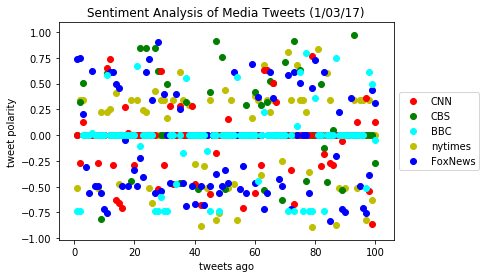

In [9]:
counter=0
counter1=0
counter2=0
counter3=0
counter4=0
for index, row in df.iterrows():
    if (row["source"]=="@CNN"):
        counter=counter+1
        CNN=plt.scatter(counter,row["comp"],c="r",marker="o")
    if (row["source"]=="@CBS"):
        counter1=counter1+1
        CBS=plt.scatter(counter1,row["comp"],c="g",marker="o")
    if (row["source"]=="@BBC"):
        counter2=counter2+1
        BBC=plt.scatter(counter2,row["comp"],c="cyan",marker="o")
    if (row["source"]=="@nytimes"):
        counter3=counter3+1
        nytimes=plt.scatter(counter3,row["comp"],c="y",marker="o")
    if (row["source"]=="@FoxNews"):
        counter4=counter4+1
        FoxNews=plt.scatter(counter4,row["comp"],c="b",marker="o")
        
plt.xlabel("tweets ago")
plt.ylabel("tweet polarity")
plt.legend(handles=[CNN,CBS,BBC,nytimes,FoxNews],labels=["CNN", "CBS", "BBC", "nytimes", "FoxNews"], loc="center left",bbox_to_anchor=(1,0.5))
plt.title("Sentiment Analysis of Media Tweets (1/03/17)")
plt.show()

In [10]:
df2 = pd.DataFrame(df.groupby("source")["comp"].mean())
df2

,comp
source,
@BBC,-0.064639
@CBS,0.078695
@CNN,-0.044633
@FoxNews,-0.086861
@nytimes,0.015723


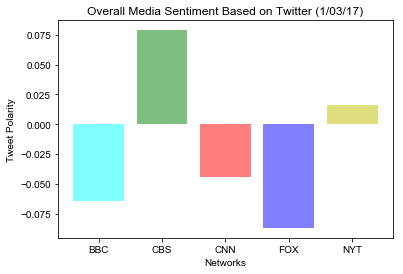

In [11]:
x_axis = np.arange(len(df2["comp"]))
compound_score = df2["comp"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (1/03/17)")
sns.set()
plt.show()